In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
import paths
from preprocessing import read_csv_clean

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M1.CSV


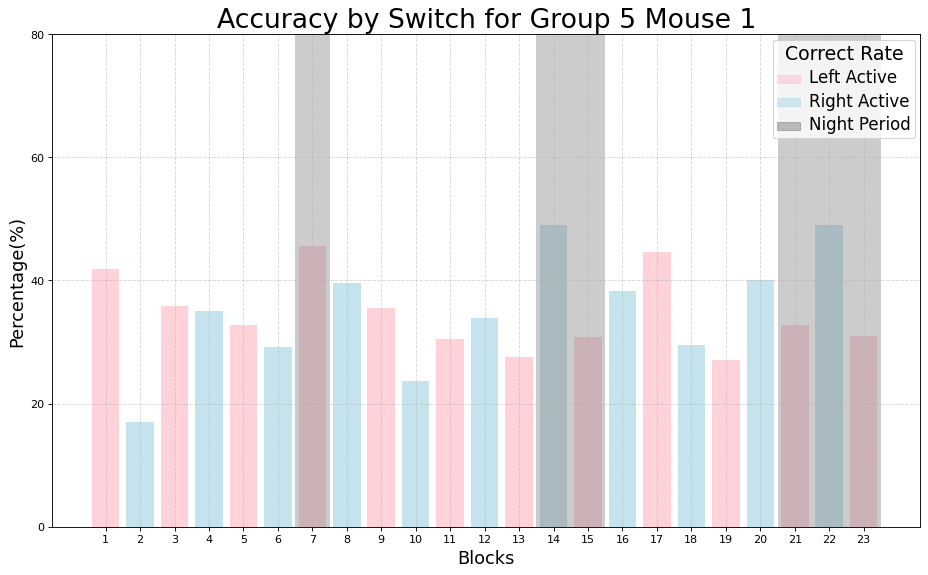

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M2.CSV


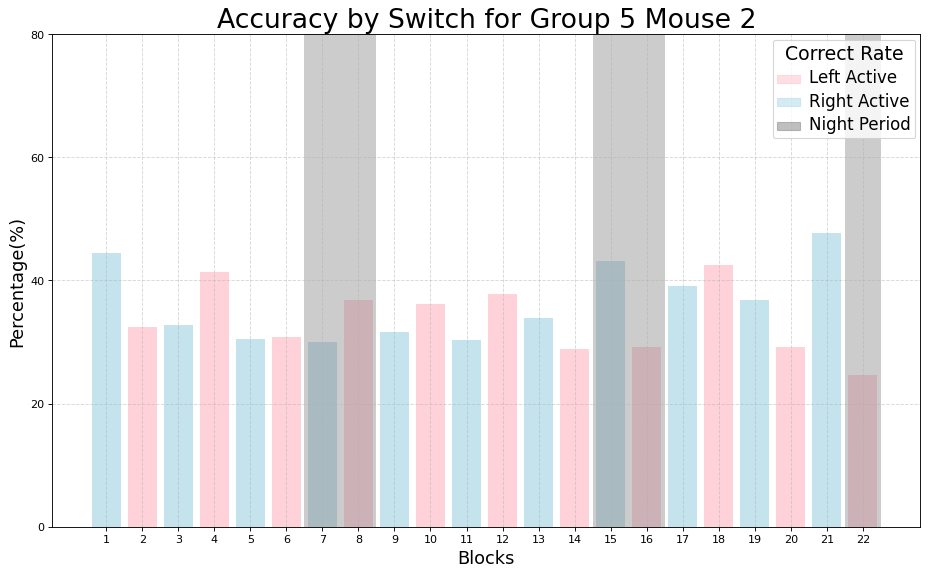

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M3.CSV


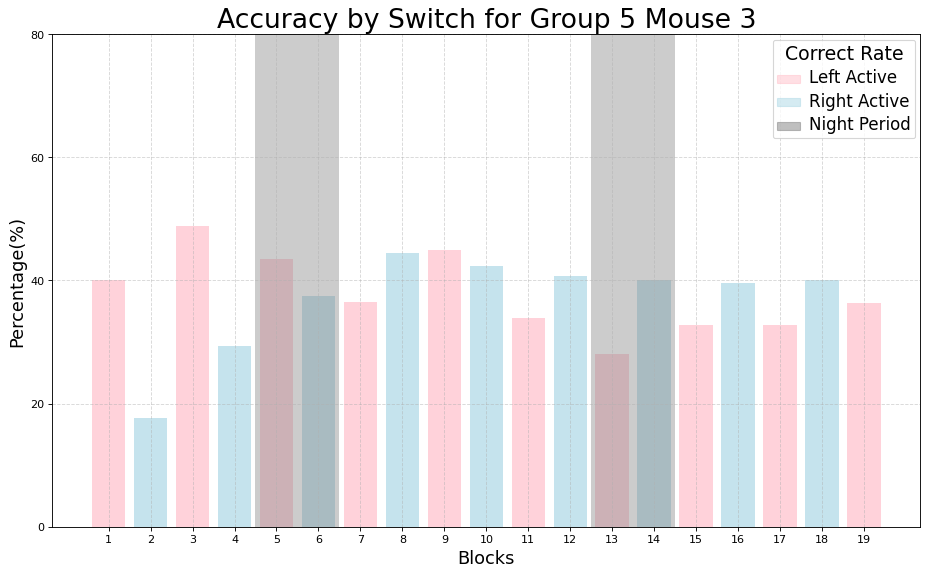

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B5M4.CSV


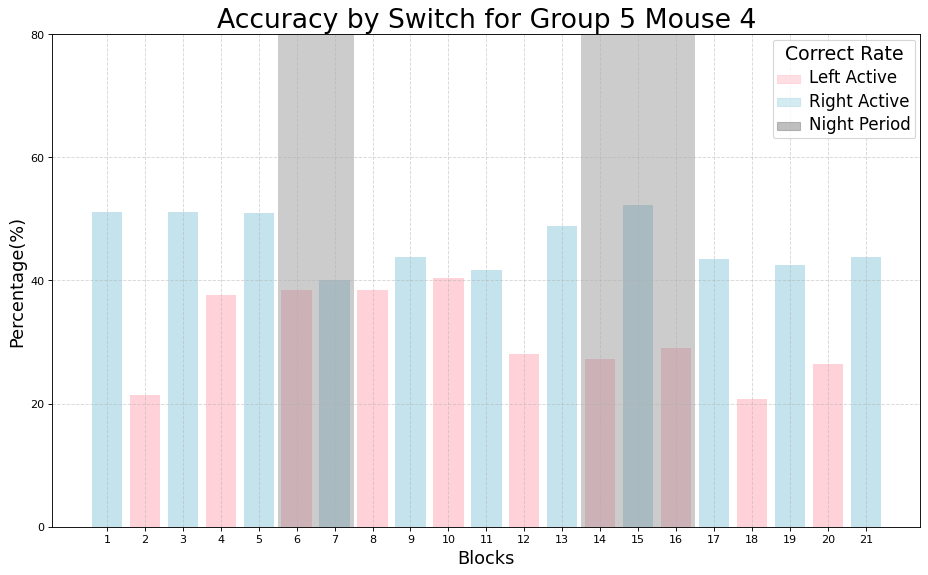

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B7M2.CSV


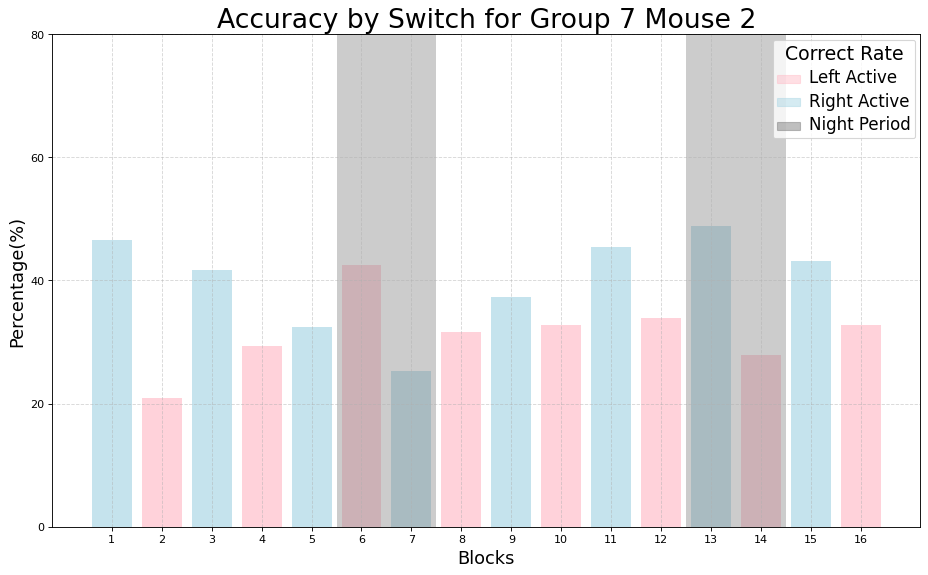

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/ctrl/B7M4.CSV


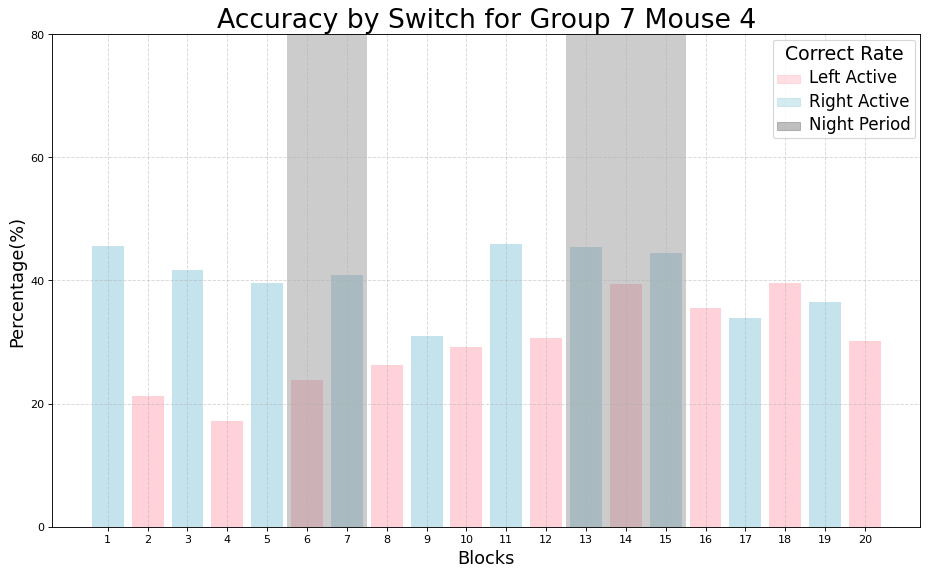

In [2]:
action_prop = 0.8
block_prop = 0.8

ctrl_scores = []

for path in paths.contigency_flip_ctrl:
    print(path)
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_learning_trend(data_stats, blocks, path, block_prop=block_prop, action_prop=action_prop)
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M1.CSV


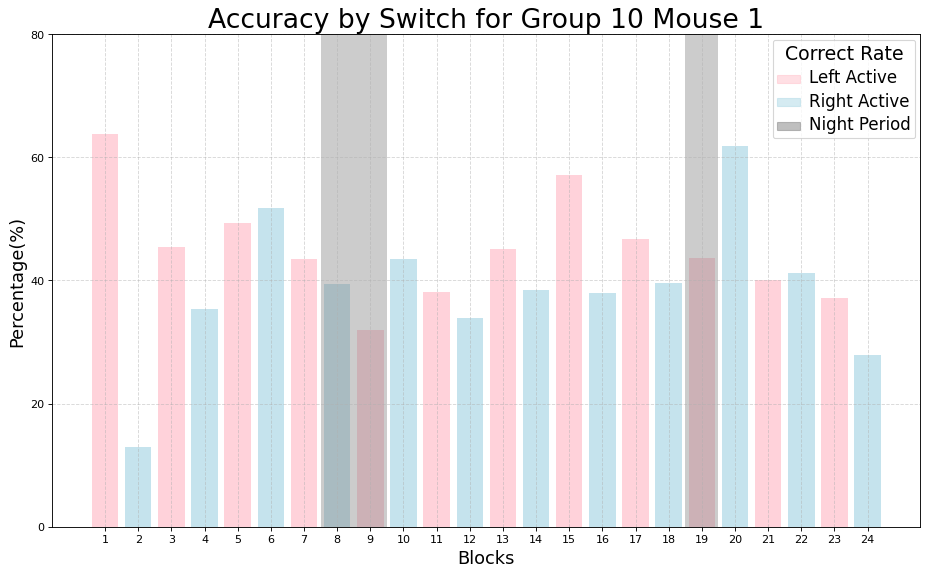

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M2.CSV


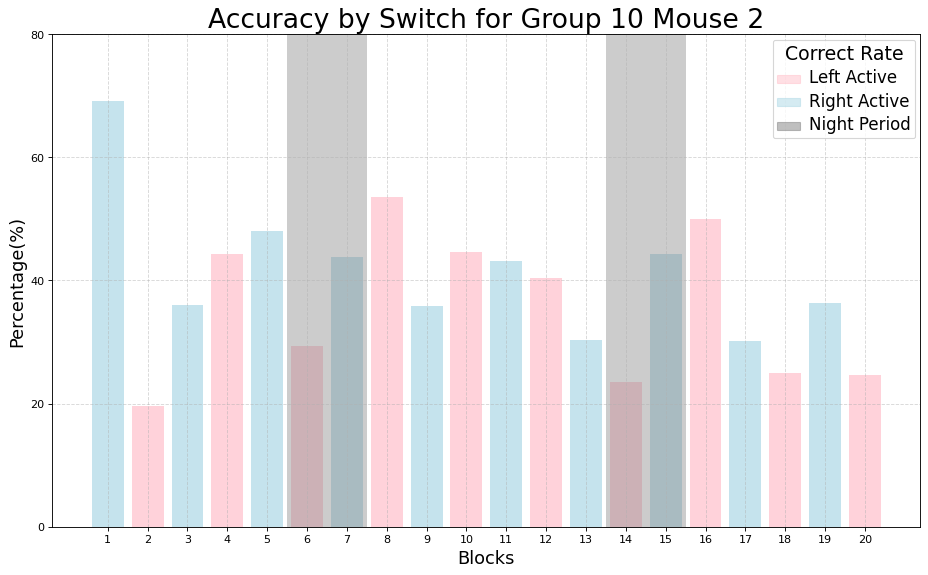

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M3.CSV


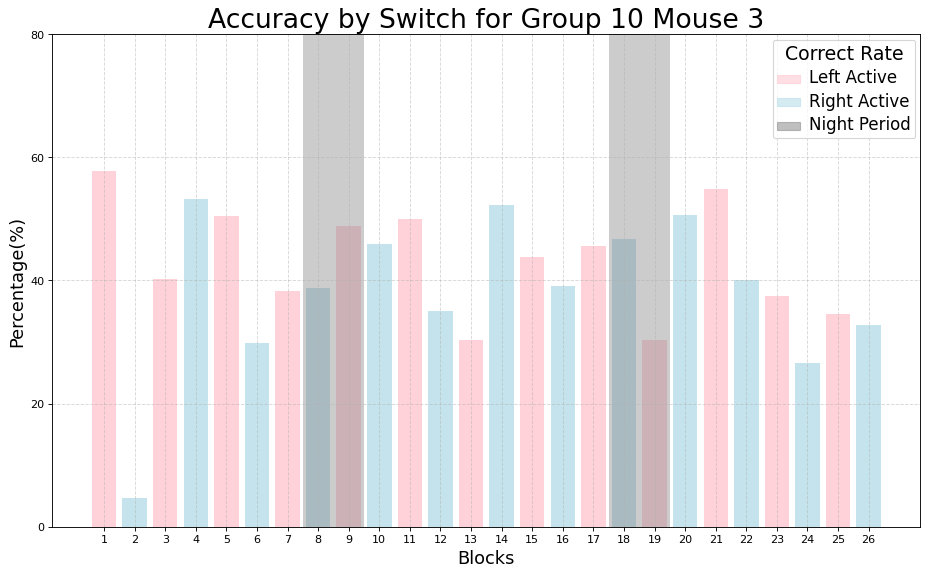

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M4.CSV


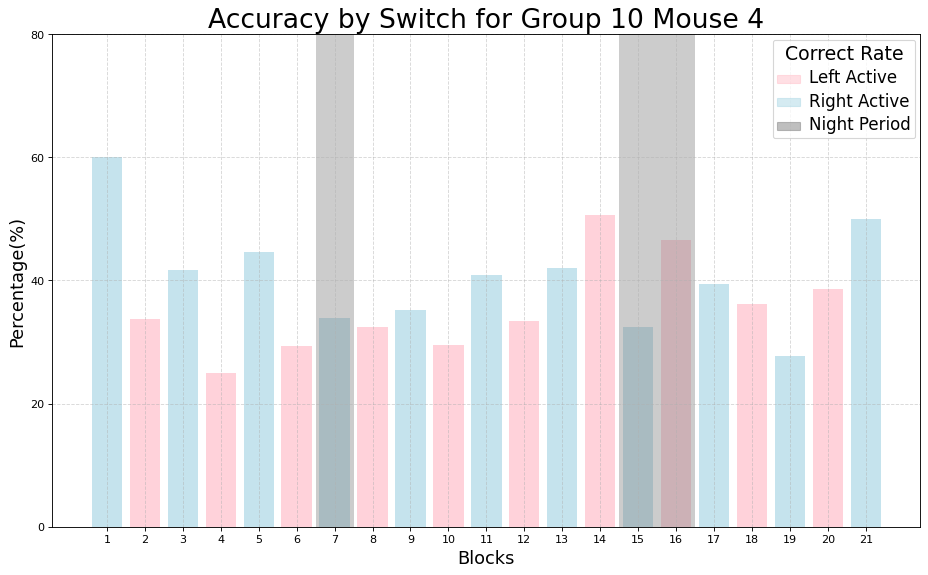

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B10M5.CSV


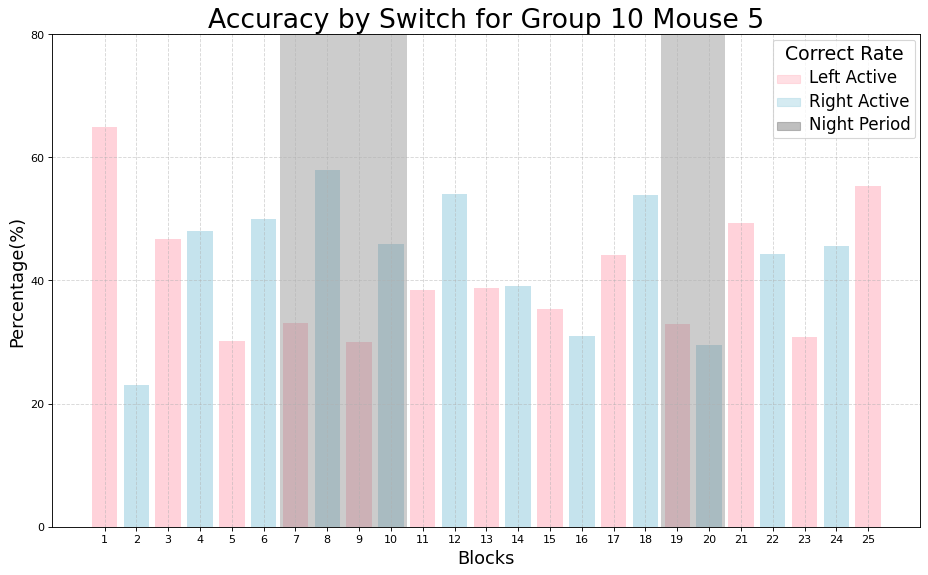

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M1.CSV


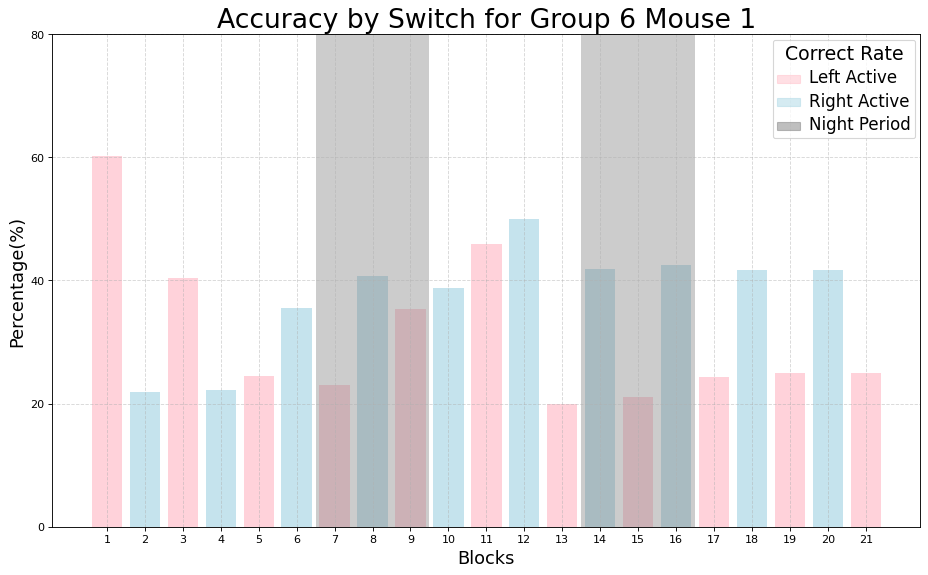

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M2.CSV


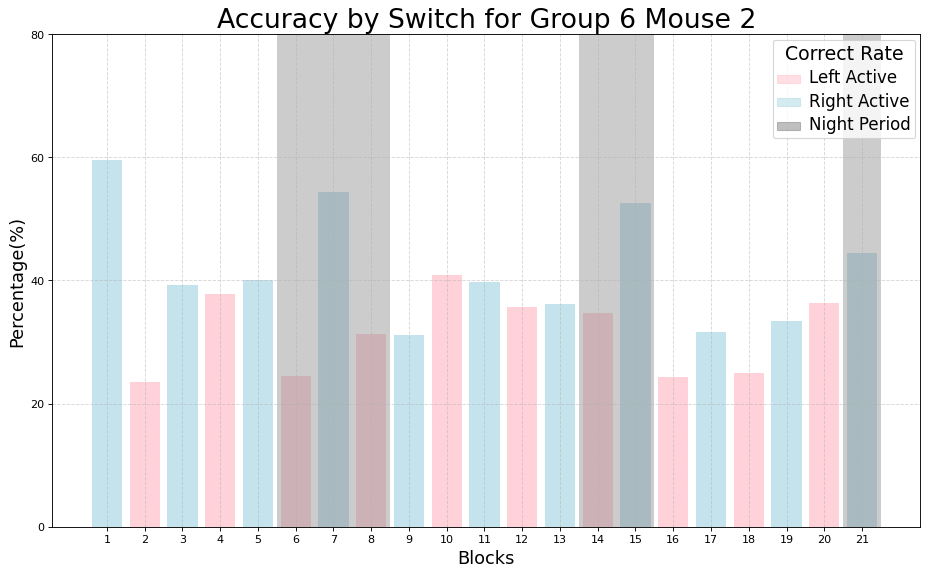

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M3.CSV


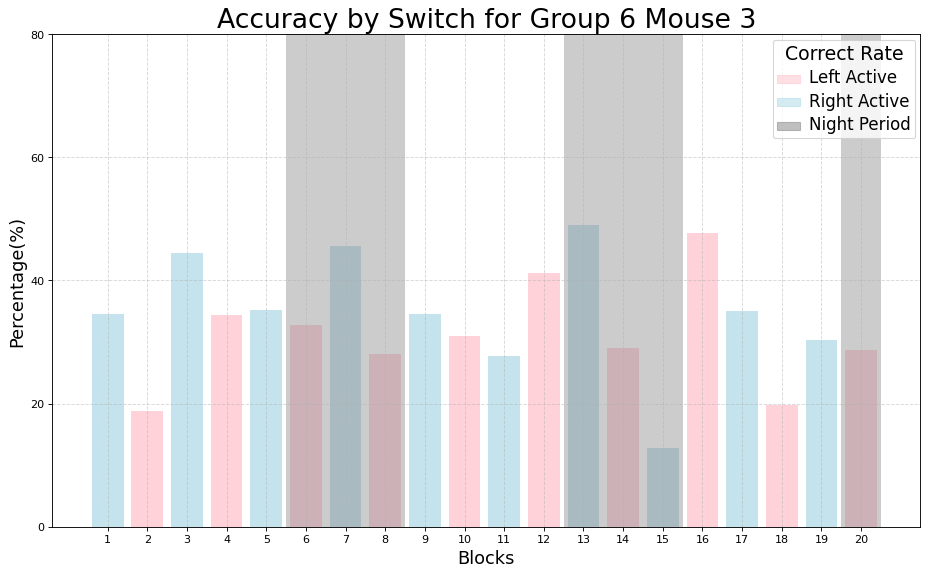

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B6M4.CSV


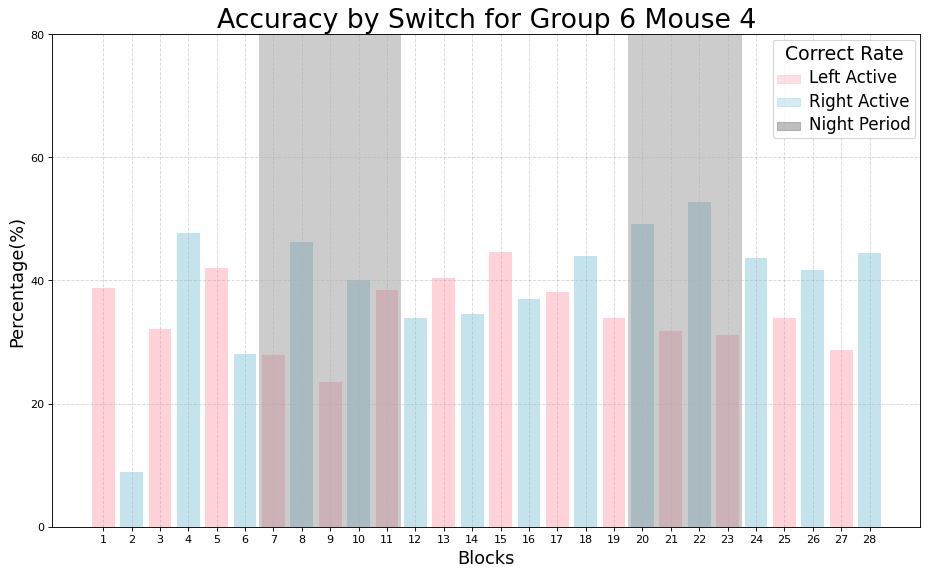

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B8M1.CSV


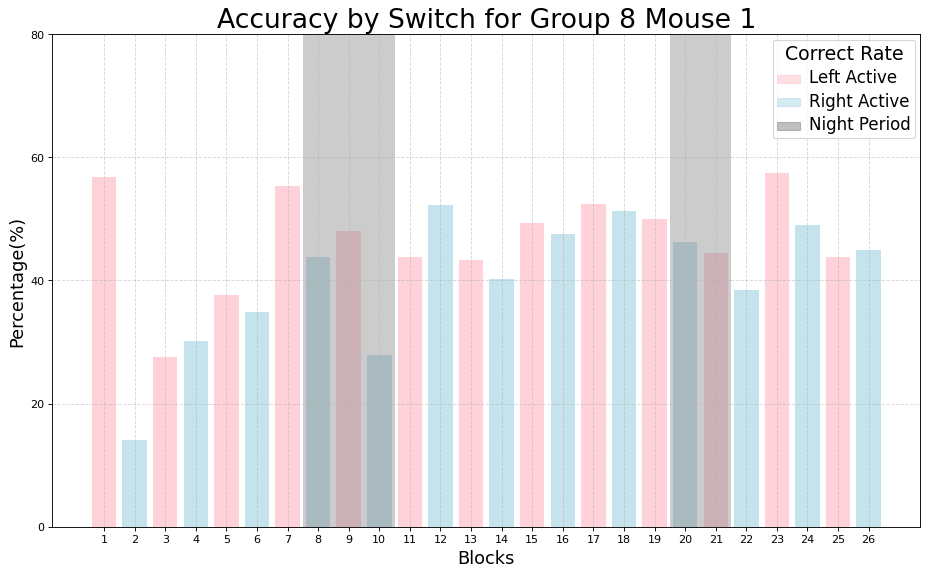

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B8M2.CSV


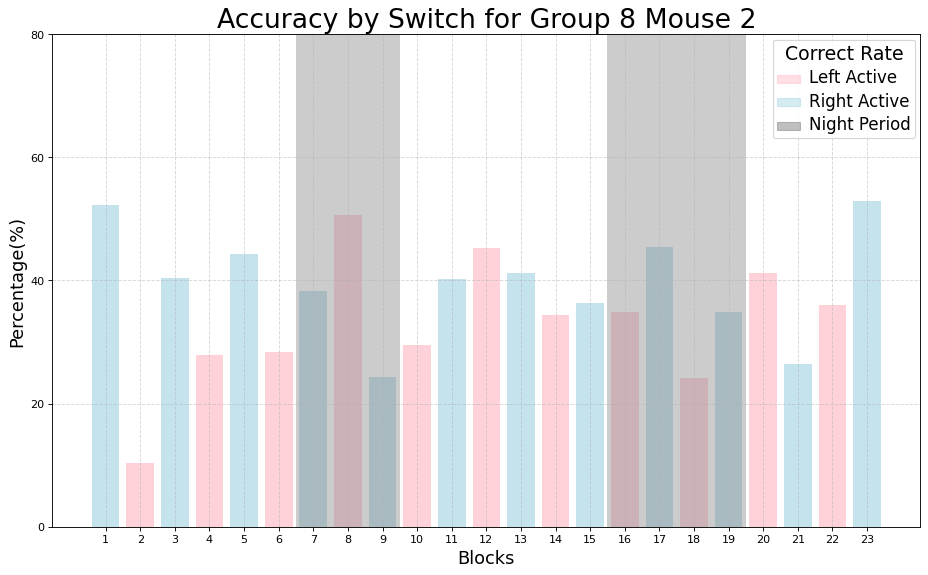

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B8M3.CSV


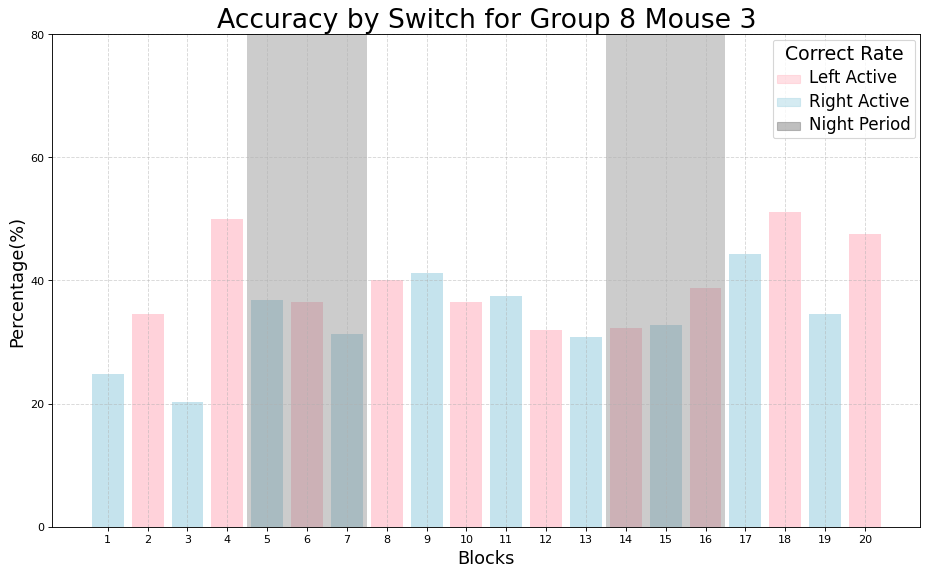

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B9M1.CSV


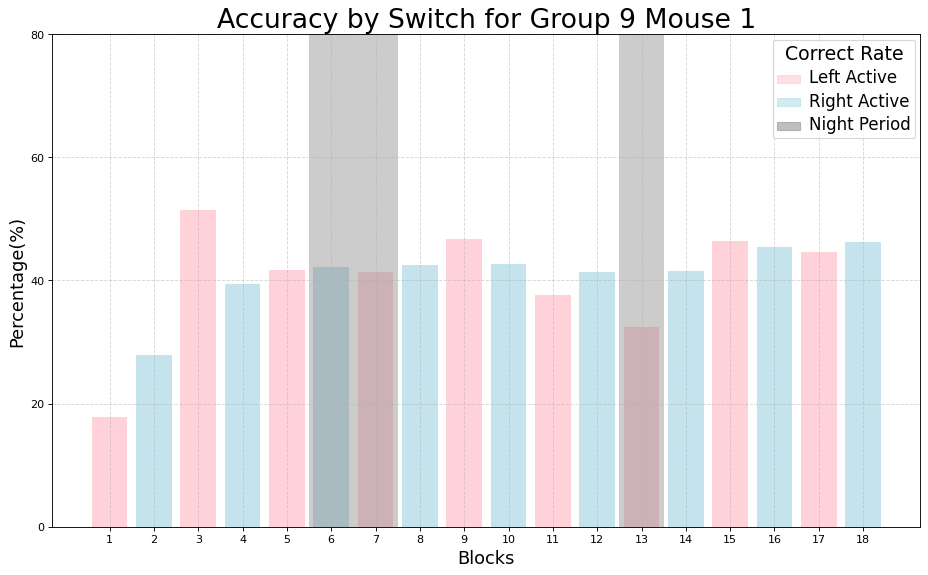

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CASK/reversal/cask/B9M2.CSV


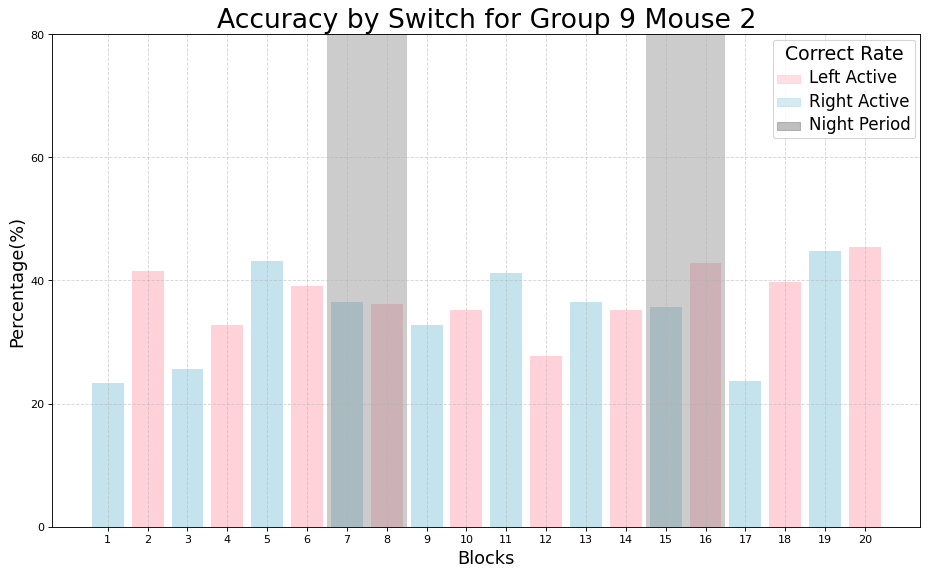

In [3]:
cask_scores = []

for path in paths.contigency_flip_cask:
    print(path)
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_learning_trend(data_stats, blocks, path, block_prop=block_prop, action_prop=action_prop)
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [4]:
import intervals as invs

invs.perform_T_test(ctrl_scores, cask_scores, test_side='greater')

P Value is  0.04518341469030594
Experiment group is significantly greater than control group


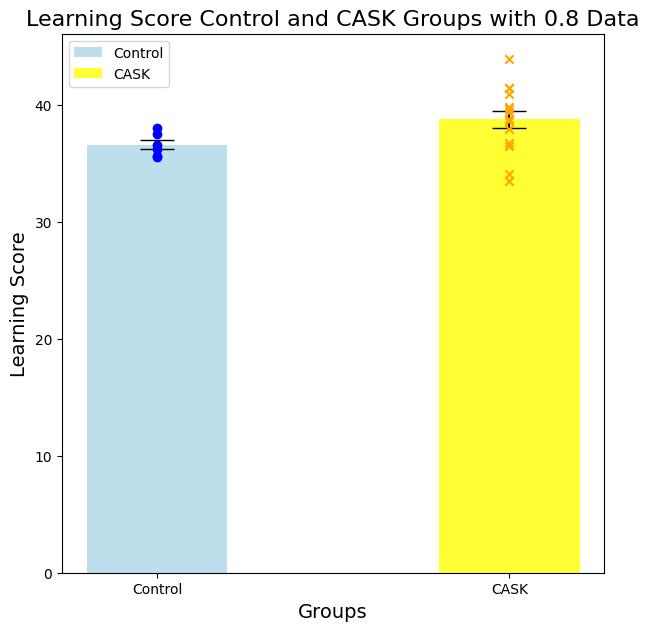

In [5]:
dit.graph_learning_score(ctrl_scores, cask_scores, exp_group_name='CASK', proportion=action_prop)